<a href="https://colab.research.google.com/github/ZordoC/Hand-Written-Digit-Recogniztion-July--2019/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h5> 
  
  <h1> <center> Introduction </h1>
    
  </h5>

  <br>
  <br>
  
&nbsp; This is a little introductory notebook made for myself , outsourced from multiple websites , kaggle github. Where I try to follow how to build a NN (MLP and CNN) for  hand written digit recognition, this isn't anything serious it's just a way of introducing me to this new technology , and try to follow along some guides, and hopefully make some personal tweaks on the code itself ! 
  
<br>
<br>  
  
  <h5>
  <h2><center> Preface</h2>
 </h5>
 <br>
    <br>
    
    
&nbsp; So for starters, very recently I have been drawn to Neural Networks, I have been consuming content non stop for the pasts months, I even did some online courses about it , but in reality when I tried to apply some of the knowledge I got, it fell pretty short of my expectations, I know a lot of theory , I could explain the whole math behind the Neural Networks , what is each parameter , how they relate and so on ! 
    
&nbsp; But it when came to apply them to real world problems I felt unable to produce any tangible model, so this why I'm here doing this, now that I know the theory it's time to apply some tools and see how they work ! 
    
    
    
    
    
    

In [0]:
#Basics

import numpy as np 
import pandas as pd 


#Pre processing 

from keras.utils.np_utils import to_categorical 



#Vizualizations 

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# Modelling 

from sklearn.model_selection import train_test_split
import tensorflow as tf



In [58]:
# reading the train data from github


url = 'https://raw.githubusercontent.com/ZordoC/Hand-Written-Digit-Recogniztion-July--2019/master/train.csv'

train = pd.read_csv(url)

print(train.shape)

train.head()


(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# reading the test data from github


url = 'https://raw.githubusercontent.com/ZordoC/Hand-Written-Digit-Recogniztion-July--2019/master/test.csv'

test = pd.read_csv(url)


print(test.shape)


test.head()


(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Preprocessing 

## Reshaping 

In [0]:
# storing the labeled dataset in numpy arrays
X_train = np.array(train.iloc[:, 1:]).reshape(train.shape[0], 28, 28, 1)
y_train = np.array(train.iloc[:, 0]).ravel()


# one-hot encoded labels instead of digits to use in categorical/multi-class classification
y_one_hot = to_categorical(y_train, num_classes=10)



# storing the unlabelled dataset in a numpy array for manual model testing
X_test = np.array(test.iloc[:, :]).reshape(test.shape[0], 28, 28, 1)

# correc data types 

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')

# make sure that the number of examples equals the number of labels after reshaping
assert(dataset_x.shape[0] == dataset_y.size)

Let's vizualize the train pictures 

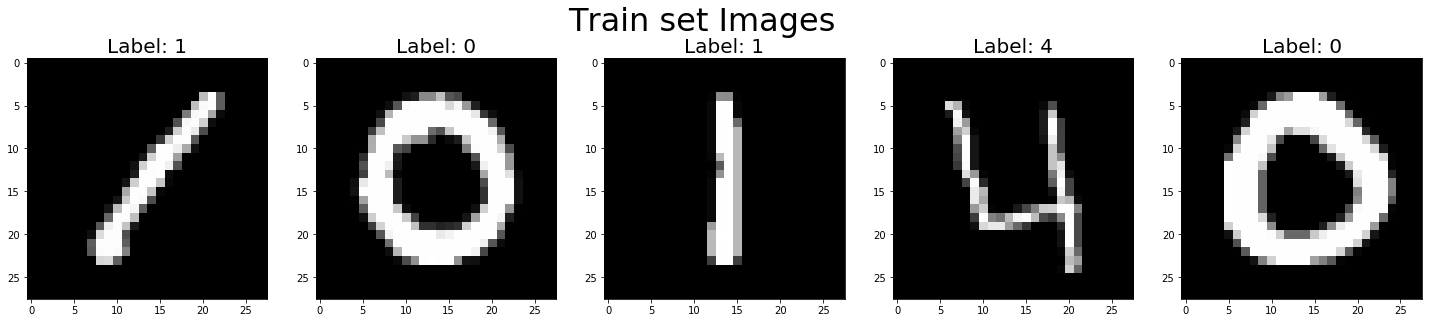

In [77]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
indexes = np.random.choice(range(X_train.shape[2]), size=5)  # returns random 5 indexes

index = range(0,5)  # choose indexes on my own 

fig.suptitle('Train set Images', size=32)

for idx, ax in zip(index, axs):
      
      ax.imshow(X_train[idx,:, :, 0], cmap='gray');
      
      ax.set_title(f'Label: {dataset_y[idx]}', size= 20);

Let's try to do the same for the test images, because after predicting the unlabled test set, we can see the picture to compare results 

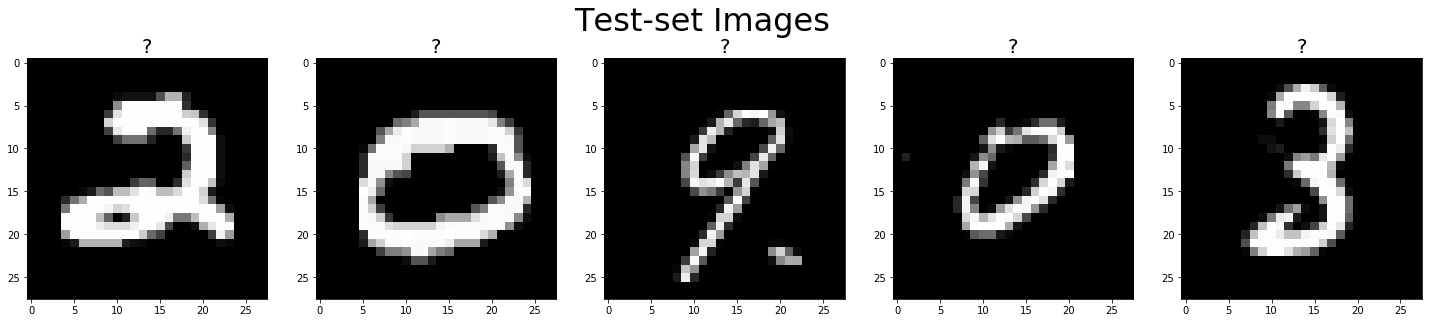

In [81]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
indexes = np.random.choice(range(X_test.shape[2]), size=5)  # returns random 5 indexes

index = range(0,5)  # choose indexes on my own 

fig.suptitle('Test-set Images', size=32)

for idx, ax in zip(index, axs):
      
      ax.imshow(X_test[idx,:, :, 0], cmap='gray');
      
      ax.set_title('?', size= 20);

Let's see the label class balance , and see if we have an equal distribution 

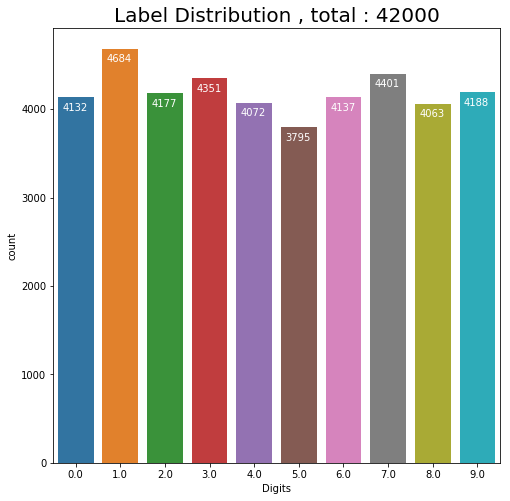

In [84]:
fig = plt.figure(figsize=(8, 8))  # create figure

ax = fig.add_subplot(111)  # add subplot

sns.countplot(y_train);

ax.set_title('Label Distribution , total : {}'.format(len(y_train)) , size=20);

ax.set_xlabel('Digits');

# writes the counts on each bar
for patch in ax.patches:
        ax.annotate('{:}'.format(patch.get_height()), (patch.get_x()+0.1, patch.get_height()-150), color='w')

No class imbalance, so we can trust accuracy to be our metric of choice ! 

Normalizing the data 

In [0]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

# Making a Sequential Neural Network  (MLP)

In [0]:
seed = 43 

np.random.seed(seed)



In [0]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # transforms our 3d ( Height , width , colour) pixel array into a 1d flatten array.
    
    tf.keras.layers.Dense(128, activation = tf.nn.relu), # layer with 128 neurons, with relu activation function
    
    tf.keras.layers.Dense(10 ,activation = tf.nn.softmax) # softmax function for output gives us the probablity value of each categorical label  
    
    
    
])

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compiling the network 

<br>

Every compilations of a NN needs   :

<br>

*   Loss function or error function to evaluate every epoch of our network 
*   Optimizer for updating our network in order to reduce our Loss function
*   Metrics . (I chose accuracy to monitor  our NN is performance  )

<br>


In [0]:
model.compile(optimizer='adam', 
              
  loss= 'categorical_crossentropy',
  
  metrics= ['accuracy'])
              
              
              
              

In [92]:
# fitting the model into the data 

model.fit(X_train,y_one_hot , epochs = 20 , batch_size=32 )

Epoch 1/20
42000/42000 [==============================] - 4s 90us/sample - loss: 3.3150 - acc: 0.8558
Epoch 2/20
42000/42000 [==============================] - 4s 85us/sample - loss: 0.4452 - acc: 0.9027
Epoch 3/20
42000/42000 [==============================] - 4s 85us/sample - loss: 0.3369 - acc: 0.9216
Epoch 4/20
42000/42000 [==============================] - 4s 89us/sample - loss: 0.2826 - acc: 0.9290
Epoch 5/20
42000/42000 [==============================] - 4s 84us/sample - loss: 0.2549 - acc: 0.9379
Epoch 6/20
42000/42000 [==============================] - 3s 83us/sample - loss: 0.2292 - acc: 0.9414
Epoch 7/20
42000/42000 [==============================] - 4s 86us/sample - loss: 0.2296 - acc: 0.9451
Epoch 8/20
42000/42000 [==============================] - 4s 90us/sample - loss: 0.1997 - acc: 0.9508
Epoch 9/20
42000/42000 [==============================] - 4s 92us/sample - loss: 0.1850 - acc: 0.9560
Epoch 10/20
42000/42000 [==============================] - 4s 85us/sample - loss: 

In [0]:
y_pred = model.predict(X_test) # predictions 
y_pred = np.argmax(y_pred, axis=1) # we need only the best fits  

In [104]:
y_pred[0:5] # predictions for the first 5 rows 


array([2, 0, 9, 9, 3])

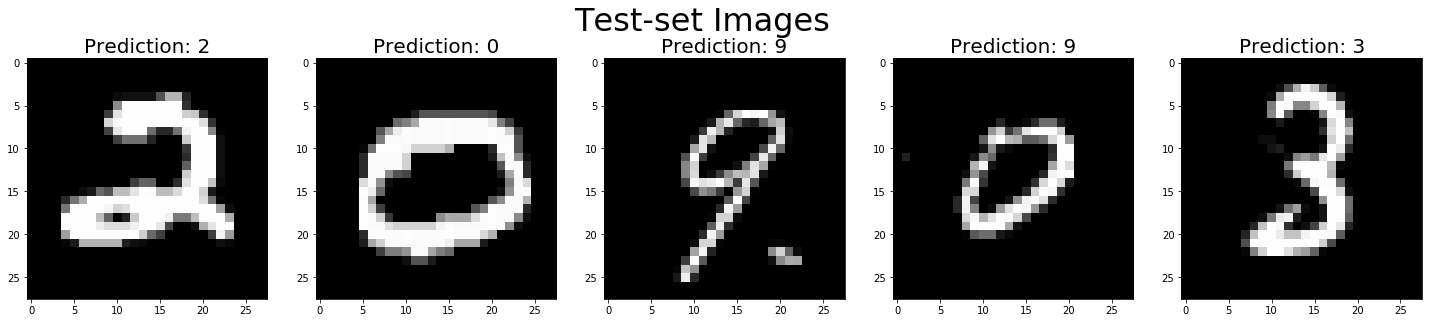

In [100]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
indexes = np.random.choice(range(X_test.shape[2]), size=5)  # returns random 5 indexes

index = range(0,5)  # choose indexes on my own 

fig.suptitle('Test-set Images', size=32)

for idx, ax in zip(index, axs):
      
      ax.imshow(X_test[idx,:, :, 0], cmap='gray');
      
      ax.set_title(f'Prediction: {y_pred[idx]}', size= 20);

You can tune the indexes as you fit , but one interesting observation happens, when you use the first 5 rows of the test set , you have an error where a 0 is classified as an 0 , I'm not an expert by any lenghts , but I think as follows:

Every NN layer is designed to detect different patterns , first examples for instance, then the second layer tries to detect patterns based on previous patterns of the previous layers , the issue with fig 4, is that in fact looks like the top part of the 9 , so maybe we don't have enought layers to make distinctions of all patterns. This could be fixabled using more layers in the conventional MLP NN , but there's a way more powerfull NN architechture for image recogniton, the CNN ( Convolutional Neural Networks ) , and that is what the second part of this notebook will be about 

# Convolutional Neural Network ( CNN)

<br>